<a href="https://colab.research.google.com/github/talleshenry/Data_Science/blob/master/Data_Science/postgraduate/statistic/Atividade_Final_Estatistica_Talles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Final Estatística

Importando as bibliotecas

In [0]:
import pandas as pd, numpy as np, scipy as sp, seaborn as sb, statsmodels.api as sm

Carregando o arquivo de dados

In [0]:
dados_fb = pd.read_csv('fb.csv')

In [0]:
dados_fb.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16
0,1,12,4,3,0.0,2752,5091,178,109,159,3078,1640,4,79.0,17.0,100
1,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,5,130.0,29.0,164
2,1,12,3,3,0.0,2413,4373,177,113,154,2812,1503,0,66.0,14.0,80
3,1,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,58,1572.0,147.0,1777
4,1,12,2,3,0.0,7244,13594,671,410,580,6228,3200,19,325.0,49.0,393


Renomeando as colunas para melhor visualizá-las

In [0]:
dados_fb.rename(columns={'Var1': 'tipo de postagem',
                      'Var2': 'mes da postagem',
                      'Var3': 'dia da semana',
                      'Var4': 'hora da postagem',
                      'Var5': 'anuncio pago', 
                      'Var6': 'recebeu e visualizou',
                      'Var7': 'propaganda story ou timeline',
                      'Var8': 'quantidade de engajamento',
                      'Var9': 'clicaram para visualizar postagem',
                      'Var10': 'clicaram e realizaram interacao',
                      'Var11': 'usuarios que receberam e deram like',
                      'Var12': 'usuarios que receberam visualizaram e deram like',
                      'Var13': 'total de comentarios',
                      'Var14': 'total de likes',
                      'Var15': 'total de compartilhamento',
                      'Var16': 'total de interacoes'},
                      inplace=True)

In [0]:
dados_fb.head()

,tipo de postagem,mes da postagem,dia da semana,hora da postagem,anuncio pago,recebeu e visualizou,propaganda story ou timeline,quantidade de engajamento,clicaram para visualizar postagem,clicaram e realizaram interacao,usuarios que receberam e deram like,usuarios que receberam visualizaram e deram like,total de comentarios,total de likes,total de compartilhamento,total de interacoes
0,1,12,4,3,0.0,2752,5091,178,109,159,3078,1640,4,79.0,17.0,100
1,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,5,130.0,29.0,164
2,1,12,3,3,0.0,2413,4373,177,113,154,2812,1503,0,66.0,14.0,80
3,1,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,58,1572.0,147.0,1777
4,1,12,2,3,0.0,7244,13594,671,410,580,6228,3200,19,325.0,49.0,393


In [0]:
dados = dados_fb.iloc [:, 5 : 16 ]
dados

,recebeu e visualizou,propaganda story ou timeline,quantidade de engajamento,clicaram para visualizar postagem,clicaram e realizaram interacao,usuarios que receberam e deram like,usuarios que receberam visualizaram e deram like,total de comentarios,total de likes,total de compartilhamento,total de interacoes
0,2752,5091,178,109,159,3078,1640,4,79.0,17.0,100
1,10460,19057,1457,1361,1674,11710,6112,5,130.0,29.0,164
2,2413,4373,177,113,154,2812,1503,0,66.0,14.0,80
3,50128,87991,2211,790,1119,61027,32048,58,1572.0,147.0,1777
4,7244,13594,671,410,580,6228,3200,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...
495,4684,7536,733,708,985,4750,2876,5,53.0,26.0,84
496,3480,6229,537,508,687,3961,2104,0,53.0,22.0,75
497,3778,7216,625,572,795,4742,2388,4,93.0,18.0,115
498,4156,7564,626,574,832,4534,2452,7,91.0,38.0,136


## Atividade 1

Vamos agora análizar os dados, primeiro vamos ver a descrição

In [0]:
dados.describe()

,recebeu e visualizou,propaganda story ou timeline,quantidade de engajamento,clicaram para visualizar postagem,clicaram e realizaram interacao,usuarios que receberam e deram like,usuarios que receberam visualizaram e deram like,total de comentarios,total de likes,total de compartilhamento,total de interacoes
count,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.00000,499.000000,496.000000,500.000000
mean,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,7.48200,177.945892,27.266129,212.120000
std,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,21.18091,323.398742,42.613292,380.233118
min,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,0.00000,0.000000,0.000000,0.000000
25%,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,1.00000,56.500000,10.000000,71.000000
50%,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,3.00000,101.000000,19.000000,123.500000
75%,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,7.00000,187.500000,32.250000,228.500000
max,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,372.00000,5172.000000,790.000000,6334.000000


In [0]:
matriz_correlacao = dados_fb.corr()

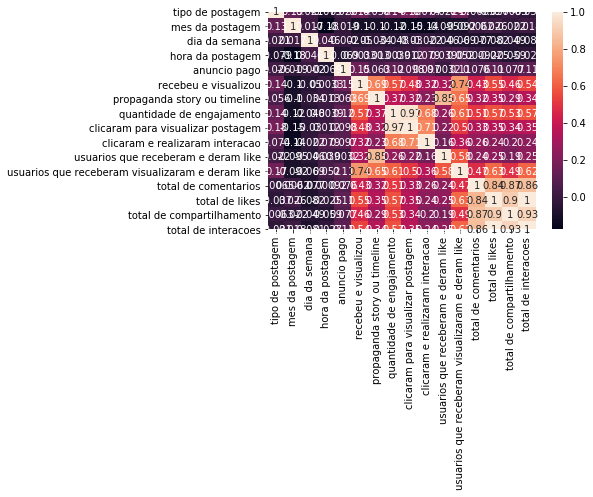

In [0]:
sb.heatmap(data = matriz_correlacao, annot = True)

Vamos observar se há uma relação entre as pessoas que receberam e vizualizaram uma postagem e a quantidade de engajamento por tipo de postagem.

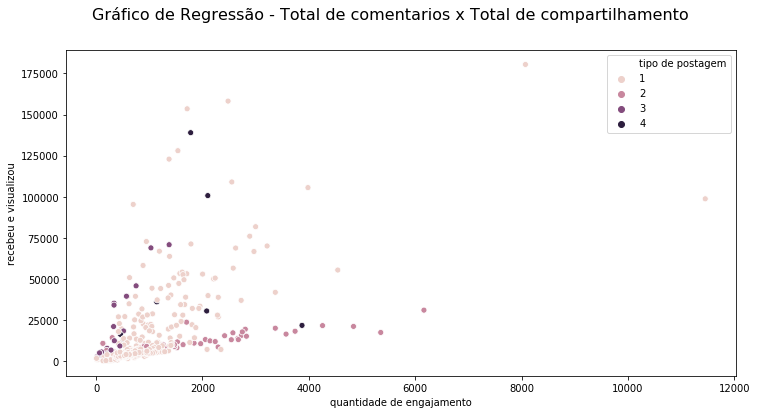

In [0]:
ax = sb.scatterplot(x = 'quantidade de engajamento', y = 'recebeu e visualizou', hue = 'tipo de postagem', data = dados_fb)
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Gráfico de Regressão - Total de comentarios x Total de compartilhamento', fontsize = 16)
ax

Ao análisar o gráfico acima, podemos ver que há uma tendencia de ter um menor engajamento quando a postagem é do tipo 3, que são os links. 

## Atividade 2

Visualizando gráfico de regressão

A) Número total de comentários como variável alvo.

Utilizei a variável 'total de compartilhamentos' como variável independente após analizar o mapa de calor. Podemos ver que há uma correlação próximo de 1 entre o número total de comentários e a total de compartilhamento.Entre eles há uma relação linear positiva.

In [0]:
dados[['total de compartilhamento', 'total de comentarios']].cov()

,total de compartilhamento,total de comentarios
total de compartilhamento,1815.892669,786.513962
total de comentarios,786.513962,448.630938


associação linear positiva , quando o numero de compartilhamento  aumentar, o numero de comantarios tende a aumentar também. Vamos observar isso no gráfico:

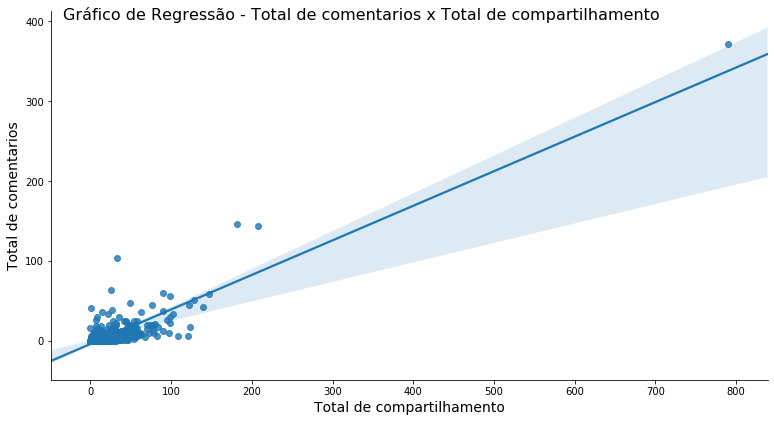

In [0]:
ax = sb.lmplot(x = 'total de compartilhamento', y = 'total de comentarios', data = dados)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Total de comentarios x Total de compartilhamento', fontsize = 16)
ax.set_xlabels('Total de compartilhamento', fontsize = 14)
ax.set_ylabels('Total de comentarios', fontsize = 14)
ax

Analisando o resultado da regressão:

In [0]:

y = dados['total de comentarios']
x = sm.add_constant(dados['total de compartilhamento'])
resultado_regressao = sm.OLS(y, x, missing='drop').fit()
print(resultado_regressao.summary())

                             OLS Regression Results                             
Dep. Variable:     total de comentarios   R-squared:                       0.754
Model:                              OLS   Adj. R-squared:                  0.754
Method:                   Least Squares   F-statistic:                     1514.
Date:                  Sun, 10 Nov 2019   Prob (F-statistic):          1.49e-152
Time:                          18:01:43   Log-Likelihood:                -1871.6
No. Observations:                   496   AIC:                             3747.
Df Residuals:                       494   BIC:                             3756.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
amostra = pd.DataFrame(dados.iloc[:, 7])
amostra['total de compartilhamento'] = dados.iloc[:, 9 ]
amostra = amostra.dropna()
amostra['total de comentario previsto'] = resultado_regressao.predict()
amostra

,total de comentarios,total de compartilhamento,total de comentario previsto
0,4,17.0,3.095791
1,5,29.0,8.293327
2,0,14.0,1.796407
3,58,147.0,59.402431
4,19,49.0,16.955887
...,...,...,...
495,5,26.0,6.993943
496,0,22.0,5.261431
497,4,18.0,3.528919
498,7,38.0,12.191479


Conseguimos um bom resultado ao prever o total de comentários pelo total de compartilhamento

Vamos observar agora a acuracia através dos resíduos

In [0]:
amostra['Residuos'] = resultado_regressao.resid
amostra.head(15)

,total de comentarios,total de compartilhamento,total de comentario previsto,Residuos
0,4,17.0,3.095791,0.904209
1,5,29.0,8.293327,-3.293327
2,0,14.0,1.796407,-1.796407
3,58,147.0,59.402431,-1.402431
4,19,49.0,16.955887,2.044113
5,1,33.0,10.025839,-9.025839
6,3,27.0,7.427071,-4.427071
7,0,14.0,1.796407,-1.796407
8,0,31.0,9.159583,-9.159583
9,3,26.0,6.993943,-3.993943


In [0]:
amostra.Residuos.describe()

count    4.960000e+02
mean     1.095360e-14
std      1.054225e+01
min     -4.214110e+01
25%     -4.435045e+00
50%     -4.970228e-01
75%      3.401129e+00
max      9.297416e+01
Name: Residuos, dtype: float64

B) Número total de Likes como variável alvo.

Utilizei a variável 'total de compartilhamentos' como variável independente após analizar o mapa de calor. Podemos ver que há uma correlação próximo de 1 entre o número total de comentários e a total de compartilhamento.Entre eles há uma relação linear positiva.

In [0]:
dados[['total de compartilhamento', 'total de likes']].cov()

,total de compartilhamento,total de likes
total de compartilhamento,1815.892669,12485.824764
total de likes,12485.824764,104586.746062


Entre eles há um associação linear positiva.

Visualizaremos no gráfico a seguir:

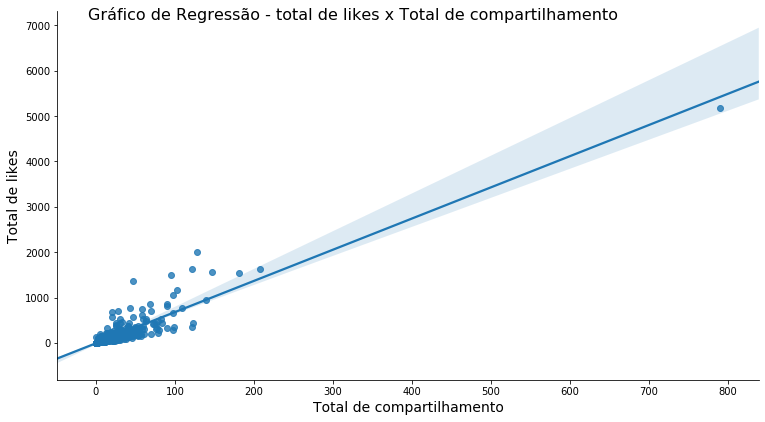

In [0]:
ax = sb.lmplot(x = 'total de compartilhamento', y = 'total de likes', data = dados)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - total de likes x Total de compartilhamento', fontsize = 16)
ax.set_xlabels('Total de compartilhamento', fontsize = 14)
ax.set_ylabels('Total de likes', fontsize = 14)
ax

In [0]:
y = dados['total de likes']
x = sm.add_constant(dados['total de compartilhamento'])
resultado_regressao = sm.OLS(y, x, missing='drop').fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:         total de likes   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2209.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          1.85e-184
Time:                        18:01:44   Log-Likelihood:                -3149.2
No. Observations:                 496   AIC:                             6302.
Df Residuals:                     494   BIC:                             6311.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
amostrab = pd.DataFrame(dados.iloc[:, 8])
amostrab['total de compartilhamento'] = dados.iloc[:, 9 ]
amostrab = amostrab.dropna()
amostrab['total de likes previsto'] = resultado_regressao.predict()
amostrab.head()

,total de likes,total de compartilhamento,total de likes previsto
0,79.0,17.0,108.379270
1,130.0,29.0,190.889597
2,66.0,14.0,87.751689
3,1572.0,147.0,1002.241142
4,325.0,49.0,328.406808


Os resultados da previsão de likes não são tem um erro maior do que na questão A, mas ainda são satisfatórios.

Vamos observar agora a acuracia através dos resíduos

In [0]:
amostrab['Residuos'] = resultado_regressao.resid
amostrab.head(15)

,total de likes,total de compartilhamento,total de likes previsto,Residuos
0,79.0,17.0,108.379270,-29.379270
1,130.0,29.0,190.889597,-60.889597
2,66.0,14.0,87.751689,-21.751689
3,1572.0,147.0,1002.241142,569.758858
4,325.0,49.0,328.406808,-3.406808
5,152.0,33.0,218.393039,-66.393039
6,249.0,27.0,177.137876,71.862124
7,325.0,14.0,87.751689,237.248311
8,161.0,31.0,204.641318,-43.641318
9,113.0,26.0,170.262015,-57.262015


In [0]:
amostrab.Residuos.describe()

count    4.960000e+02
mean     1.260640e-13
std      1.385479e+02
min     -4.784688e+02
25%     -4.974303e+01
50%     -1.168618e+01
75%      1.735524e+01
max      1.126400e+03
Name: Residuos, dtype: float64

D) Número total de iterações como variável alvo.

Utilizei a variável 'total de compartilhamentos' como variável independente após analizar o mapa de calor. Podemos ver que há uma correlação próximo de 1 entre o número total de comentários e a total de compartilhamento.

In [0]:
dados[['total de interacoes', 'total de compartilhamento']].cov()

,total de interacoes,total de compartilhamento
total de interacoes,144577.224048,15088.231395
total de compartilhamento,15088.231395,1815.892669


Entre eles há uma relação linear positiva, como podemos ver no gráfico abaixo:

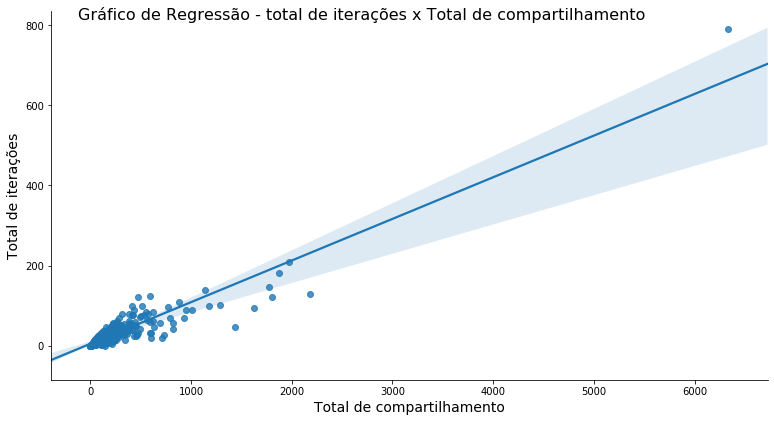

In [0]:
ax = sb.lmplot(x = 'total de interacoes', y = 'total de compartilhamento', data = dados)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - total de iterações x Total de compartilhamento', fontsize = 16)
ax.set_xlabels('Total de compartilhamento', fontsize = 14)
ax.set_ylabels('Total de iterações', fontsize = 14)
ax

Agora, vamos fazer o treinamento da base para prever o total de interações a partir do total de compartilhamento.

In [0]:
y = dados['total de interacoes']
x = sm.add_constant(dados['total de compartilhamento'])
resultado_regressao = sm.OLS(y, x, missing='drop').fit()
print(resultado_regressao.summary())

                             OLS Regression Results                            
Dep. Variable:     total de interacoes   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.862
Method:                  Least Squares   F-statistic:                     3091.
Date:                 Sun, 10 Nov 2019   Prob (F-statistic):          9.27e-215
Time:                         18:01:45   Log-Likelihood:                -3159.8
No. Observations:                  496   AIC:                             6324.
Df Residuals:                      494   BIC:                             6332.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
amostrac = pd.DataFrame(dados.iloc[:, 9])
amostrac['total de iterações'] = dados.iloc[:, 10]
amostrac = amostrac.dropna()
amostrac['total de iterações previsto'] = resultado_regressao.predict()
amostrac.head()

,total de compartilhamento,total de iterações,total de iterações previsto
0,17.0,100,128.475061
1,29.0,164,228.182924
2,14.0,80,103.548095
3,147.0,1777,1208.643573
4,49.0,393,394.362695


Vamos observar agora a acuracia através dos resíduos

In [0]:
amostrac['Residuos'] = resultado_regressao.resid
amostrac.head(15)

,total de compartilhamento,total de iterações,total de iterações previsto,Residuos
0,17.0,100,128.475061,-28.475061
1,29.0,164,228.182924,-64.182924
2,14.0,80,103.548095,-23.548095
3,147.0,1777,1208.643573,568.356427
4,49.0,393,394.362695,-1.362695
5,33.0,186,261.418878,-75.418878
6,27.0,279,211.564947,67.435053
7,14.0,339,103.548095,235.451905
8,31.0,192,244.800901,-52.800901
9,26.0,142,203.255958,-61.255958


In [0]:
amostrac.Residuos.describe()

count    4.960000e+02
mean     1.019973e-14
std      1.415402e+02
min     -5.206099e+02
25%     -5.347506e+01
50%     -1.044697e+01
75%      2.069207e+01
max      1.126227e+03
Name: Residuos, dtype: float64